In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('GOOG.csv', date_parser = True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,778.809998,789.630005,775.799988,786.140015,786.140015,1657300
1,2017-01-04,788.359985,791.340027,783.159973,786.900024,786.900024,1073000
2,2017-01-05,786.080017,794.479980,785.020020,794.020020,794.020020,1335200
3,2017-01-06,795.260010,807.900024,792.203979,806.150024,806.150024,1640200
4,2017-01-09,806.400024,809.966003,802.830017,806.650024,806.650024,1274600
...,...,...,...,...,...,...,...
1024,2021-01-28,1843.939941,1898.829956,1842.640015,1863.109985,1863.109985,1773100
1025,2021-01-29,1846.170044,1857.280029,1810.199951,1835.739990,1835.739990,1612600
1026,2021-02-01,1853.569946,1922.391968,1850.930054,1901.349976,1901.349976,1602200
1027,2021-02-02,1922.560059,1955.760010,1914.489990,1927.510010,1927.510010,2273700


In [4]:
data_training = data[data['Date']<'2020-10-01'].copy()
data_test = data[data['Date']>='2020-10-01'].copy()

In [5]:
data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)

In [6]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training #shape(3805,5)

array([[0.        , 0.        , 0.        , 0.        , 0.22353443],
       [0.01025883, 0.00181233, 0.00826472, 0.00080668, 0.12381603],
       [0.00780963, 0.00514014, 0.01035342, 0.00836394, 0.16856387],
       ...,
       [0.74701577, 0.7282815 , 0.75629239, 0.7200416 , 0.28336889],
       [0.74291229, 0.72813621, 0.76696472, 0.72514693, 0.10763717],
       [0.73905586, 0.74200621, 0.76817181, 0.72543354, 0.2310948 ]])

In [7]:
X_train = []
y_train = []

In [8]:
for i in range(60, data_training.shape[0]):
    X_train.append(data_training[i-60:i])
    y_train.append(data_training[i, 0])

In [9]:
X_train, y_train = np.array(X_train), np.array(y_train)


In [10]:
X_train.shape

(883, 60, 5)

In [11]:
y_train

array([0.05874935, 0.05388308, 0.05415163, 0.05645049, 0.06090855,
       0.05756773, 0.05279817, 0.0500374 , 0.04930694, 0.04632056,
       0.04654617, 0.04962919, 0.05952276, 0.0655062 , 0.06727869,
       0.06882558, 0.07776314, 0.09258742, 0.1025025 , 0.10182573,
       0.14163649, 0.13226928, 0.14051932, 0.14614825, 0.15819033,
       0.16621476, 0.15824403, 0.1698779 , 0.16453897, 0.15738466,
       0.16405562, 0.165581  , 0.17315427, 0.16850286, 0.152744  ,
       0.1639911 , 0.16778315, 0.18166211, 0.18709769, 0.1917706 ,
       0.20505876, 0.20571402, 0.21077364, 0.20425309, 0.20480095,
       0.21241717, 0.21951778, 0.21612326, 0.21864766, 0.22095727,
       0.17268161, 0.18594826, 0.19455281, 0.16667667, 0.17315427,
       0.18385357, 0.19197471, 0.18780671, 0.19324228, 0.19123349,
       0.20527361, 0.17579689, 0.1613378 , 0.16232607, 0.15816882,
       0.14326933, 0.13207593, 0.13461109, 0.13969215, 0.15357118,
       0.16191786, 0.17173629, 0.17991112, 0.18604497, 0.19141

# Building LSTM

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [13]:
regressior = Sequential()

regressior.add(LSTM(units = 30, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 100, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 200, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 50, activation = 'relu'))
regressior.add(Dropout(0.2))

regressior.add(Dense(units = 1))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
regressior.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 30)            4320      
_________________________________________________________________
dropout (Dropout)            (None, 60, 30)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 100)           52400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 100)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 200)           240800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 200)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                50200     
__________

In [15]:
regressior.compile(optimizer='adam', loss = 'mean_squared_error')

Instructions for updating:
Use tf.cast instead.


In [16]:
regressior.fit(X_train, y_train, epochs=70, batch_size=8)

Instructions for updating:
Use tf.cast instead.
Epoch 1/70
883/883 [==============================] - 21s 24ms/sample - loss: 0.0191
Epoch 2/70
883/883 [==============================] - 19s 21ms/sample - loss: 0.0077
Epoch 3/70
883/883 [==============================] - 18s 21ms/sample - loss: 0.0060
Epoch 4/70
883/883 [==============================] - 19s 21ms/sample - loss: 0.0051
Epoch 5/70
883/883 [==============================] - 19s 21ms/sample - loss: 0.0048
Epoch 6/70
883/883 [==============================] - 18s 21ms/sample - loss: 0.0051
Epoch 7/70
883/883 [==============================] - 18s 21ms/sample - loss: 0.0055
Epoch 8/70
883/883 [==============================] - 19s 21ms/sample - loss: 0.0046
Epoch 9/70
883/883 [==============================] - 18s 20ms/sample - loss: 0.0043
Epoch 10/70
883/883 [==============================] - 19s 21ms/sample - loss: 0.0039
Epoch 11/70
883/883 [==============================] - 19s 21ms/sample - loss: 0.0033
Epoch 12/70
883

# Prepare test dataset


In [17]:
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
943,2020-10-01,1484.270020,1499.040039,1479.209961,1490.089966,1490.089966,1779500
944,2020-10-02,1462.030029,1483.199951,1450.920044,1458.420044,1458.420044,1284100
945,2020-10-05,1466.209961,1488.209961,1464.270020,1486.020020,1486.020020,1113300
946,2020-10-06,1475.579956,1486.760010,1448.589966,1453.439941,1453.439941,1245400
947,2020-10-07,1464.290039,1468.959961,1436.000000,1460.290039,1460.290039,1746200
...,...,...,...,...,...,...,...
1024,2021-01-28,1843.939941,1898.829956,1842.640015,1863.109985,1863.109985,1773100
1025,2021-01-29,1846.170044,1857.280029,1810.199951,1835.739990,1835.739990,1612600
1026,2021-02-01,1853.569946,1922.391968,1850.930054,1901.349976,1901.349976,1602200
1027,2021-02-02,1922.560059,1955.760010,1914.489990,1927.510010,1927.510010,2273700


In [18]:
data_training = data[data['Date']<'2019-10-01'].copy()

In [19]:
past_60_days = data_training.tail(60)


In [20]:
df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,1125.170044,1125.979980,1111.209961,1116.349976,1236400
1,1111.800049,1128.025024,1107.170044,1124.829956,1330400
2,1131.219971,1142.050049,1130.969971,1140.479980,1209500
3,1143.250000,1153.069946,1139.579956,1144.209961,1195500
4,1143.989990,1147.339966,1138.780029,1144.900024,864000


In [21]:
inputs = scaler.transform(df)
inputs #shape (380,5)

array([[ 3.72068494e-01,  3.56472850e-01,  3.76640860e-01,
         3.50489265e-01,  1.51702364e-01],
       [ 3.57706116e-01,  3.58640243e-01,  3.72104329e-01,
         3.59490029e-01,  1.67744688e-01],
       [ 3.78567475e-01,  3.73504346e-01,  3.98829906e-01,
         3.76101174e-01,  1.47111528e-01],
       [ 3.91490428e-01,  3.85183533e-01,  4.08498289e-01,
         3.80060225e-01,  1.44722246e-01],
       [ 3.92285344e-01,  3.79110744e-01,  4.07600029e-01,
         3.80792667e-01,  8.81474529e-02],
       [ 3.95368363e-01,  3.82798921e-01,  4.08296238e-01,
         3.86566695e-01,  9.49398413e-02],
       [ 3.94444546e-01,  3.91023191e-01,  4.14584602e-01,
         3.90005663e-01,  1.52111955e-01],
       [ 3.99783411e-01,  3.90790060e-01,  4.15449278e-01,
         3.82331666e-01,  1.40370339e-01],
       [ 3.89868338e-01,  3.79391613e-01,  4.00806267e-01,
         3.82310416e-01,  1.60969366e-01],
       [ 3.96797034e-01,  3.83138139e-01,  3.97313981e-01,
         3.65083699e-01

In [22]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

In [23]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((86, 60, 5), (86,))

In [24]:
y_pred = regressior.predict(X_test)

In [25]:
scaler.scale_

array([1.07422464e-03, 1.05982719e-03, 1.12292684e-03, 1.06141336e-03,
       1.70663026e-07])

In [26]:
scale = 1/8.16599709e-04
scale

1224.5901988191868

In [27]:
y_pred = y_pred*scale
y_test = y_test*scale

# Visualization

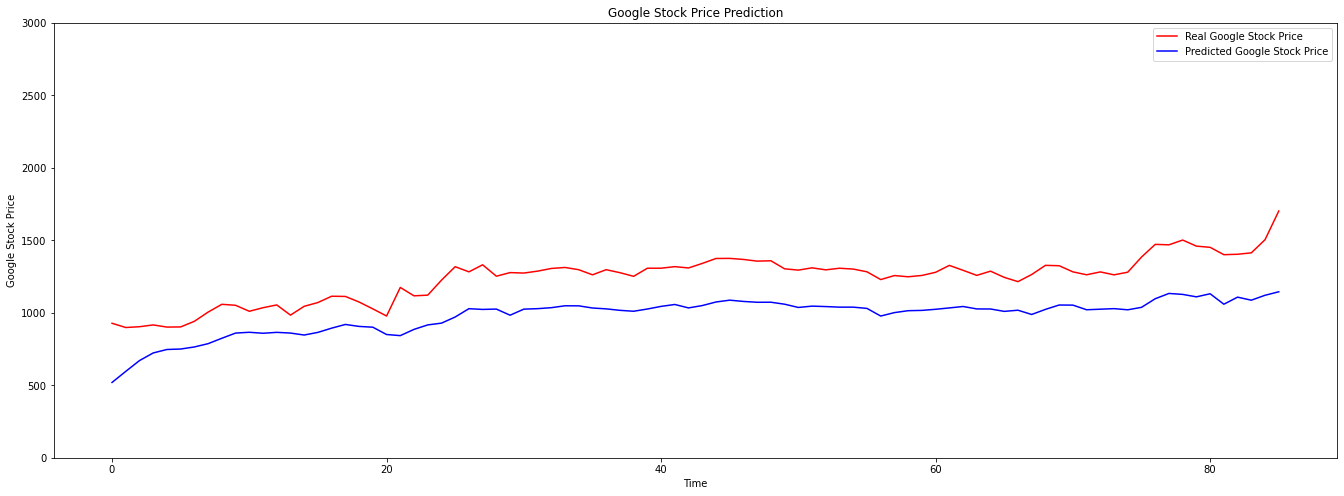

In [30]:
plt.figure(figsize=(23,8))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.ylim([0,3000])
plt.legend()
plt.show()

In [31]:
y_train = y_train*scale

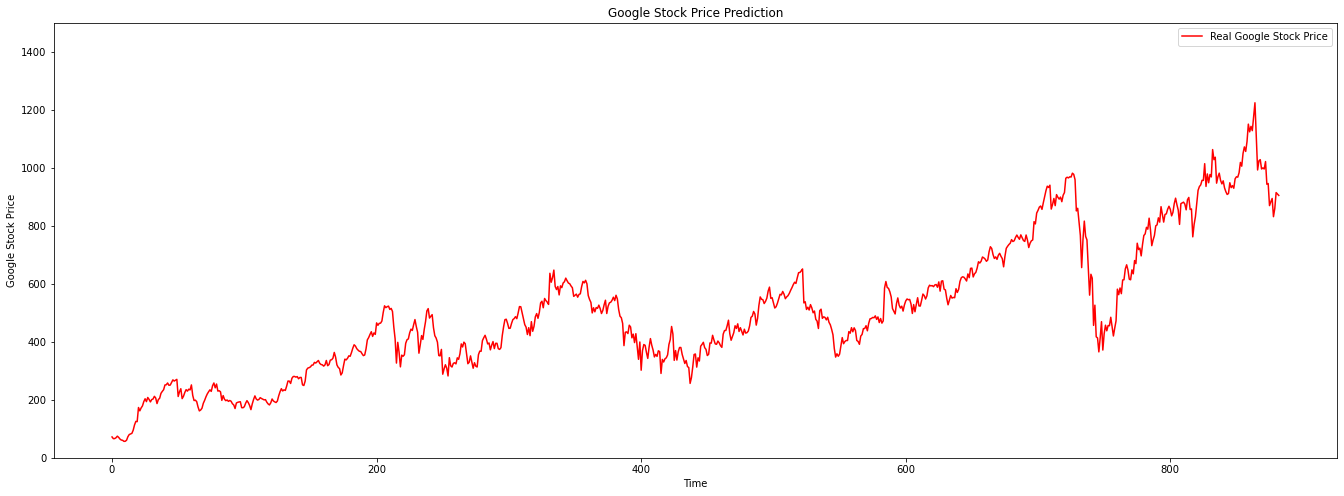

In [32]:
plt.figure(figsize=(23,8))
plt.plot(y_train,  color = 'red', label = 'Real Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.ylim([0,1500])
plt.legend()
plt.show()